# Recipe - Simplicial complex from pairwise data

In [1]:
import networkx as nx
import xgi

In [2]:
G = nx.barabasi_albert_graph(n=100, m=2, seed=1)
H = xgi.flag_complex_d2(G)

print(H)

Unnamed SimplicialComplex with 100 nodes and 219 simplices


# Recipe - Laplacian spectrum

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eigh

In [4]:
H = xgi.random_hypergraph(N=100, ps=[0.2, 0.02], seed=1)

In [5]:
orders = np.array(xgi.unique_edge_sizes(H)) - 1

L_multi = xgi.multiorder_laplacian(H, orders=orders, weights=[1] * len(orders))

eivals, eivects = eigh(L_multi)

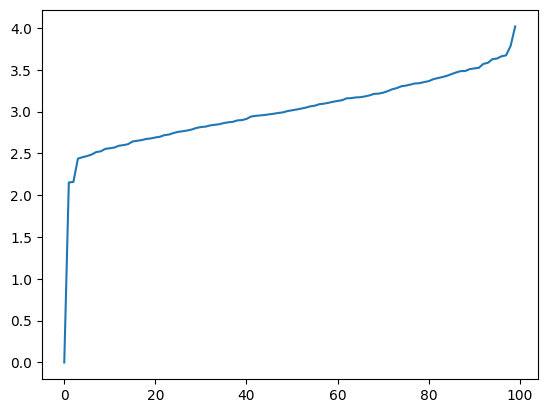

In [6]:
plt.plot(eivals)

# Adjacency tensor

In [7]:
from itertools import permutations


def adjacency_tensor(H, order):
    N = H.num_nodes
    shape = tuple([N] * (order + 1))
    tensor = np.zeros(shape)

    edges = H.edges.filterby("order", order)
    for id, members in edges.members(dtype=dict).items():
        for idcs in permutations(members):
            tensor[idcs] = 1

    return tensor

In [8]:
print(adjacency_tensor(H, 1).shape)
print(adjacency_tensor(H, 2).shape)

(100, 100)
(100, 100, 100)
